In [1]:
# Transmissionselektronenmikroskop, Felix Soest & Sebastian Thiede
# Import der benötigten Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import PIL
from scipy.signal import find_peaks

In [2]:
b = []

Text(0.5, 1.0, 'Theoretische Radien für erlaubte hkl-Werte')

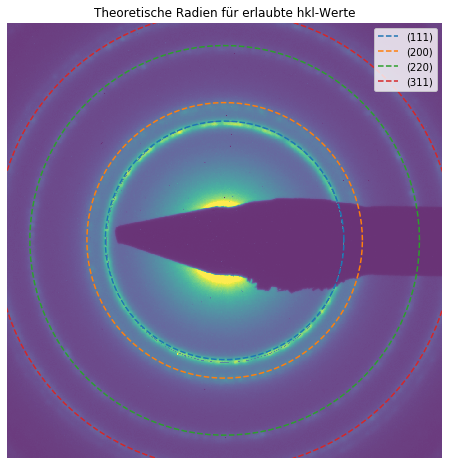

In [3]:
# Gitterebenen, Berechnung der Ringradien
hkl = [[1,1,1], [2,0,0], [2,2,0], [3,1,1]]
r = []
for val in hkl:
    v = np.sqrt(val[0]**2 + val[1]**2 + val[2]**2)
    r.append(v)
r = np.array(r)
# Erstellung Kreise für Plot
theta = np.linspace(0, 2*np.pi, 100)
x1 = np.cos(theta)
x2 = np.sin(theta)
theta = np.linspace(0, 2*np.pi, 100)

# Plotten von theoretischen Radien auf Debye-Scherrer Beugungsbild
c = np.sqrt(11) - .16
plt.figure(figsize=(8,8))
for radius in r:
    plt.plot(radius*x1, radius*x2,'--')

image = plt.imread('images/mean_debye.png')
implot = plt.imshow(image, alpha=0.8, extent=[-c, c, -c, c])
plt.legend(['(111)', '(200)', '(220)', '(311)'], loc='upper right')
plt.axis('off')
plt.title("Theoretische Radien für erlaubte hkl-Werte")


[4.268 4.866 6.968 8.164]
[13.02663885  8.19327479  9.40808508  6.84215721]


9.36753898325813

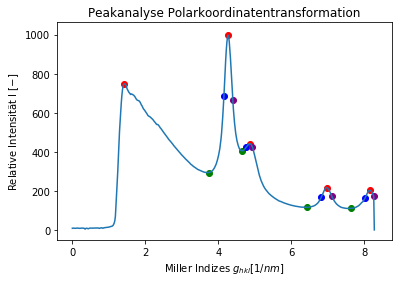

In [4]:
# Bestimmung Gitterkonstante indirekt
# Importieren der Daten, Peakanalyse
gold_data = pd.read_csv('useddata/gold.csv', header=0)
plt.plot(gold_data['ghkl'], gold_data['intensity'])
peaks = find_peaks(gold_data['intensity'], threshold=0.3)
peak_values = pd.DataFrame()
peak_values['peakx'] = [gold_data['ghkl'][peak] for peak in peaks[0]]
peak_values['peaky'] = [gold_data['intensity'][peak] for peak in peaks[0]]

min_peaks = find_peaks(-1*gold_data['intensity'], threshold=0.07)
min_peak_values = pd.DataFrame()
min_peak_values['peakx'] = [gold_data['ghkl'][peak] for peak in min_peaks[0]]
min_peak_values['peaky'] = [gold_data['intensity'][peak] for peak in min_peaks[0]]
min_peak_values = min_peak_values[10:]

# Auswählen der Peaks, plotten in Intensitätsdiagramm
peak_values = peak_values[5:]
plt.scatter(peak_values['peakx'], peak_values['peaky'], c='red')
plt.scatter(min_peak_values['peakx'], min_peak_values['peaky'], c='green')
plt.title('Peakanalyse Polarkoordinatentransformation')
plt.ylabel('Relative Intensität I $[-]$')
plt.xlabel('Miller Indizes $g_{hkl} [1/nm]$')

# Gitterkonstantenberechnung aus hkl und d_hkl
peak_values = peak_values[1:]
g = peak_values['peakx'].to_numpy()
print(g)
a = []
a.append(np.sqrt(3)/4.268)
a.append(2/4.866)
a.append(np.sqrt(8)/6.968)
a.append(np.sqrt(11)/8.164)
np.mean(a)
np.std(a,ddof=1)
err = np.std(a, ddof=1)/2

# Fehlerabschätzung
# Minimale und Maximale Peaks
peaky = peak_values['peaky'].to_numpy()
min_peaky = min_peak_values['peaky'].to_numpy()
syst_error = peaky - (peaky - min_peaky)*0.5
fehler = []
i = 0
# Suche von Punkt an Grenze 0.5* (Max_peak - Min_peak)
for peak in peaky:
    lidx = np.where(gold_data['intensity'] == peak)[0][0]
    ridx = np.where(gold_data['intensity'] == peak)[0][0]
    while gold_data['intensity'][lidx] > syst_error[i]:
        lidx -= 1
    while gold_data['intensity'][ridx] > syst_error[i]:
        ridx += 1
    i += 1
    plt.scatter(gold_data['ghkl'][lidx+1], gold_data['intensity'][lidx+1], c='blue')
    plt.scatter(gold_data['ghkl'][ridx-1], gold_data['intensity'][ridx-1], c='purple')
    fehler.append(0.5*(gold_data['ghkl'][ridx]-gold_data['ghkl'][lidx]))
plt.savefig('images/polar.png')
# Berechnung und Ausgabe von Messunsicherheiten
delta_a = r * fehler / (g*g)
print(delta_a*1000)
np.mean(delta_a)*1000

25.614123708089917
0.23933333333333331


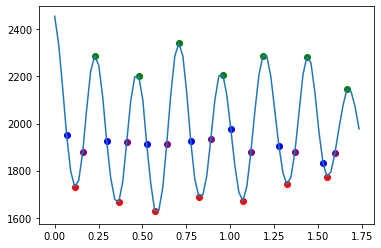

In [5]:
# Indirekte Methode, Peakanalyse, Plotten, Messung #1
data_1 = pd.read_csv('useddata/real1.csv')
plt.plot(data_1['ort'], data_1['intensity'])
peaks = find_peaks(-1*data_1['intensity'], threshold=0.3)
peak_values = pd.DataFrame()
peak_values['peakx'] = [data_1['ort'][peak] for peak in peaks[0]]
peak_values['peaky'] = [data_1['intensity'][peak] for peak in peaks[0]]
plt.scatter(peak_values['peakx'], peak_values['peaky'], c='red')
vals = peak_values['peakx']
b.append((vals[len(vals)-1]-vals[0])/(len(vals)-1))

max_peak_values = pd.DataFrame()
max_peaks = find_peaks(data_1['intensity'])
max_peak_values['peakx'] = [data_1['ort'][peak] for peak in max_peaks[0]]
max_peak_values['peaky'] = [data_1['intensity'][peak] for peak in max_peaks[0]]
plt.scatter(max_peak_values['peakx'], max_peak_values['peaky'], c='green')

# Messunsicherheiten via Peak, wie oben

peaky = peak_values['peaky'].to_numpy()
max_peaky = max_peak_values['peaky'].to_numpy()
syst_error = peaky - (peaky - max_peaky)*0.5

fehler = []
i=0
for peak in peaky:
    lidx = np.where(data_1['intensity'] == peak)[0][0]
    ridx = np.where(data_1['intensity'] == peak)[0][0]
    while data_1['intensity'][lidx] < syst_error[i]:
        lidx -= 1
    while data_1['intensity'][ridx] < syst_error[i]:
        ridx += 1
    i += 1
    plt.scatter(data_1['ort'][lidx+1], data_1['intensity'][lidx+1], c='blue')
    plt.scatter(data_1['ort'][ridx-1], data_1['intensity'][ridx-1], c='purple')
    fehler.append(0.5*(data_1['ort'][ridx]-data_1['ort'][lidx]))
delta_d = np.sqrt(fehler[0]**2 + fehler[len(fehler)-1]**2)/(len(fehler)-1)
print(delta_d * np.sqrt(3)*1000)
print((vals[len(vals)-1]-vals[0])/(len(vals)-1))
plt.savefig('images/indirekt1.png')


48.6139126176859
0.20024999999999998


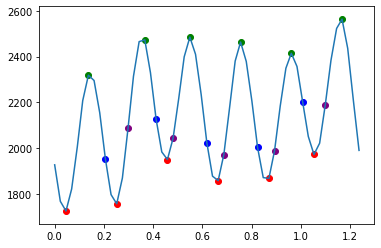

In [6]:
# Indirekte Methode, Peakanalyse, Plotten, Messung #2
data_1 = pd.read_csv('useddata/real2.csv')
plt.plot(data_1['ort'], data_1['intensity'])
peaks = find_peaks(-1*data_1['intensity'], threshold=0.3)
peak_values = pd.DataFrame()
peak_values['peakx'] = [data_1['ort'][peak] for peak in peaks[0]]
peak_values['peaky'] = [data_1['intensity'][peak] for peak in peaks[0]]
plt.scatter(peak_values['peakx'], peak_values['peaky'], c='red')
vals = peak_values['peakx']
b.append((vals[len(vals)-1]-vals[1])/(len(vals)-2))

max_peak_values = pd.DataFrame()
max_peaks = find_peaks(data_1['intensity'])
max_peak_values['peakx'] = [data_1['ort'][peak] for peak in max_peaks[0]]
max_peak_values['peaky'] = [data_1['intensity'][peak] for peak in max_peaks[0]]
plt.scatter(max_peak_values['peakx'], max_peak_values['peaky'], c='green')

# Messunsicherheiten via Peak, wie oben
peaky = peak_values['peaky'][1:].to_numpy()
max_peaky = max_peak_values['peaky'][1:].to_numpy()
syst_error = peaky - (peaky - max_peaky)*0.5

fehler = []
i=0
for peak in peaky:
    lidx = np.where(data_1['intensity'] == peak)[0][0]
    ridx = np.where(data_1['intensity'] == peak)[0][0]
    while data_1['intensity'][lidx] < syst_error[i]:
        lidx -= 1
    while data_1['intensity'][ridx] < syst_error[i]:
        ridx += 1
    i += 1
    plt.scatter(data_1['ort'][lidx+1], data_1['intensity'][lidx+1], c='blue')
    plt.scatter(data_1['ort'][ridx-1], data_1['intensity'][ridx-1], c='purple')
    fehler.append(0.5*(data_1['ort'][ridx]-data_1['ort'][lidx]))
delta_d = np.sqrt(fehler[0]**2 + fehler[len(fehler)-1]**2)/(len(fehler)-1)
print(delta_d * np.sqrt(4)*1000)
print((vals[len(vals)-1]-vals[1])/(len(vals)-2))
plt.savefig('images/indirekt2.png')


20.973755922580967
0.24225000000000002


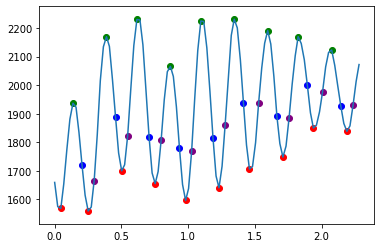

In [7]:
# Indirekte Methode, Peakanalyse, Plotten, Messung #3
data_1 = pd.read_csv('useddata/real3.csv')
plt.plot(data_1['ort'], data_1['intensity'])
peaks = find_peaks(-1*data_1['intensity'], threshold=0.3)
peak_values = pd.DataFrame()
peak_values['peakx'] = [data_1['ort'][peak] for peak in peaks[0]]
peak_values['peaky'] = [data_1['intensity'][peak] for peak in peaks[0]]
plt.scatter(peak_values['peakx'], peak_values['peaky'], c='red')
vals = peak_values['peakx']
b.append((vals[len(vals)-1]-vals[1])/(len(vals)-2))

max_peak_values = pd.DataFrame()
max_peaks = find_peaks(data_1['intensity'])
max_peak_values['peakx'] = [data_1['ort'][peak] for peak in max_peaks[0]]
max_peak_values['peaky'] = [data_1['intensity'][peak] for peak in max_peaks[0]]
plt.scatter(max_peak_values['peakx'], max_peak_values['peaky'], c='green')

peaky = peak_values['peaky'][1:].to_numpy()
max_peaky = max_peak_values['peaky'].to_numpy()
syst_error = peaky - (peaky - max_peaky)*0.5

# Messunsicherheiten via Peak, wie oben
fehler = []
i=0
for peak in peaky:
    lidx = np.where(data_1['intensity'] == peak)[0][0]
    ridx = np.where(data_1['intensity'] == peak)[0][0]
    while data_1['intensity'][lidx] < syst_error[i]:
        lidx -= 1
    while data_1['intensity'][ridx] < syst_error[i]:
        ridx += 1
    i += 1
    plt.scatter(data_1['ort'][lidx+1], data_1['intensity'][lidx+1], c='blue')
    plt.scatter(data_1['ort'][ridx-1], data_1['intensity'][ridx-1], c='purple')
    fehler.append(0.5*(data_1['ort'][ridx]-data_1['ort'][lidx]))
delta_d = np.sqrt(fehler[0]**2 + fehler[len(fehler)-1]**2)/(len(fehler)-1)
print(delta_d * np.sqrt(3)*1000)
print((vals[len(vals)-1]-vals[1])/(len(vals)-2))
plt.savefig('images/indirekt3.png')


20.820662813657023
0.23299999999999998


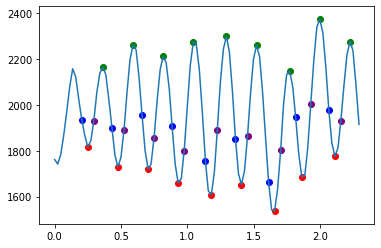

In [8]:
# Indirekte Methode, Peakanalyse, Plotten, Messung #4
data_1 = pd.read_csv('useddata/real4.csv')
plt.plot(data_1['ort'], data_1['intensity'])
peaks = find_peaks(-1*data_1['intensity'], threshold=0.3)
peak_values = pd.DataFrame()
peak_values['peakx'] = [data_1['ort'][peak] for peak in peaks[0]]
peak_values['peaky'] = [data_1['intensity'][peak] for peak in peaks[0]]
plt.scatter(peak_values['peakx'][1:], peak_values['peaky'][1:], c='red')
vals = peak_values['peakx']
b.append((vals[len(vals)-1]-vals[1])/(len(vals)-2))

max_peak_values = pd.DataFrame()
max_peaks = find_peaks(data_1['intensity'])
max_peak_values['peakx'] = [data_1['ort'][peak] for peak in max_peaks[0]]
max_peak_values['peaky'] = [data_1['intensity'][peak] for peak in max_peaks[0]]
plt.scatter(max_peak_values['peakx'][1:], max_peak_values['peaky'][1:], c='green')

# Messunsicherheiten via Peak, wie oben
peaky = peak_values['peaky'][1:].to_numpy()
max_peaky = max_peak_values['peaky'][1:].to_numpy()
syst_error = peaky - (peaky - max_peaky)*0.5

fehler = []
i=0
for peak in peaky:
    lidx = np.where(data_1['intensity'] == peak)[0][0]
    ridx = np.where(data_1['intensity'] == peak)[0][0]
    while data_1['intensity'][lidx] < syst_error[i]:
        lidx -= 1
    while data_1['intensity'][ridx] < syst_error[i]:
        ridx += 1
    i += 1
    plt.scatter(data_1['ort'][lidx+1], data_1['intensity'][lidx+1], c='blue')
    plt.scatter(data_1['ort'][ridx-1], data_1['intensity'][ridx-1], c='purple')
    fehler.append(0.5*(data_1['ort'][ridx]-data_1['ort'][lidx]))
delta_d = np.sqrt(fehler[0]**2 + fehler[len(fehler)-1]**2)/(len(fehler)-1)
print(delta_d * np.sqrt(3)*1000)
print((vals[len(vals)-1]-vals[1])/(len(vals)-2))
plt.savefig('images/indirekt4.png')


In [9]:
# Berechnung des Mittelwerts, Standardabweichung

hkl = np.array([np.sqrt(3), 2, np.sqrt(3), np.sqrt(3)])

a = b * hkl
print(a)
np.mean(a)
np.std(a, ddof=1)/2

[0.41453749 0.4005     0.41958931 0.40356784]


0.004503253916652377